# Extracting useful information from a corpus. II

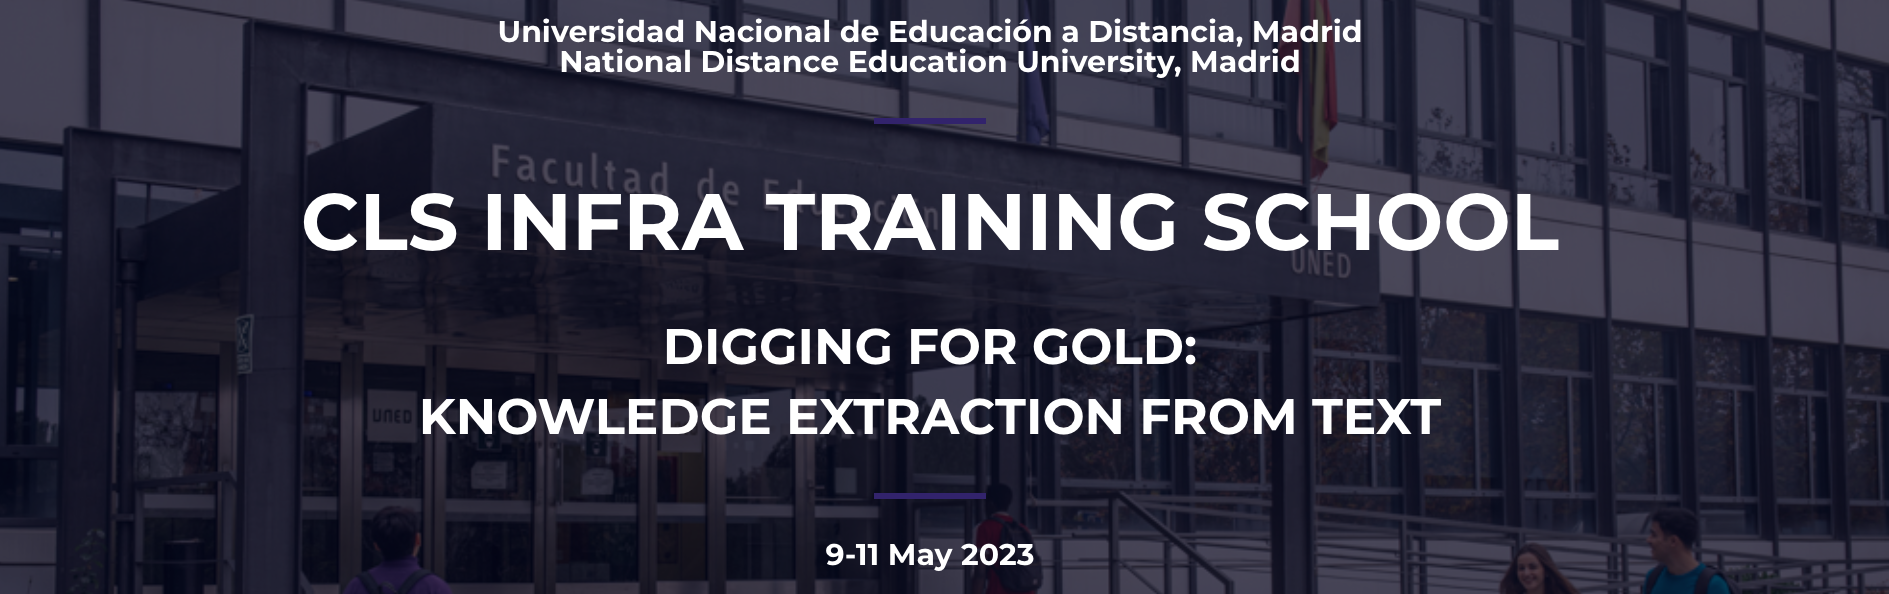

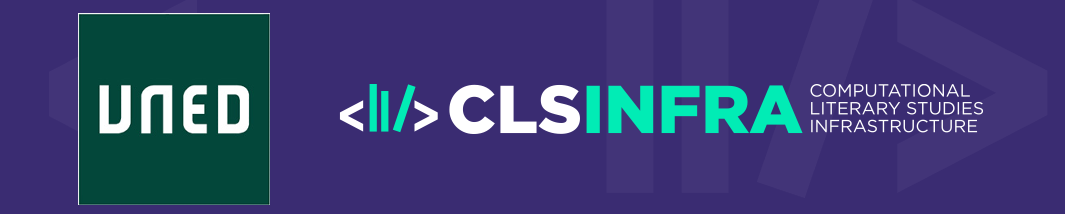

# Installing required tools

In [ ]:
%%capture
!pip install gutenbergpy
!python -m spacy download 'en_core_web_lg'

Sometimes if we are working on Google Colab we can get an error trying to load our newly downloaded spacy model, we can run this, just in case:

In [ ]:
try:
  import google.colab
  import os; os.kill(os.getpid(), 9)
except:
  pass

We get a warning telling us our sesion ended, but that's OK, we can continue working on our code, importing the libraries we are goint to need:

In [ ]:
import requests
import gutenbergpy.textget
import spacy
import pandas as pd

from spacy import displacy

# spaCy

## What is spaCy and why did we choose it?


spaCy is a natural language processing library for Python that offers a set of tools for working with text. We have chosen this tool because of its simplicity and the very good results it offers.

## Comparison with other libraries

In spaCy's own page you can see comparisons with other NLP tools, as well as use cases for each one of them: https://spacy.io/usage/facts-figures

As points to highlight, the installation and usage of SpaCy is much easier than the rest of NLP, and it also has an extremely complete documentation.

## How does spaCy works?

### The architecture

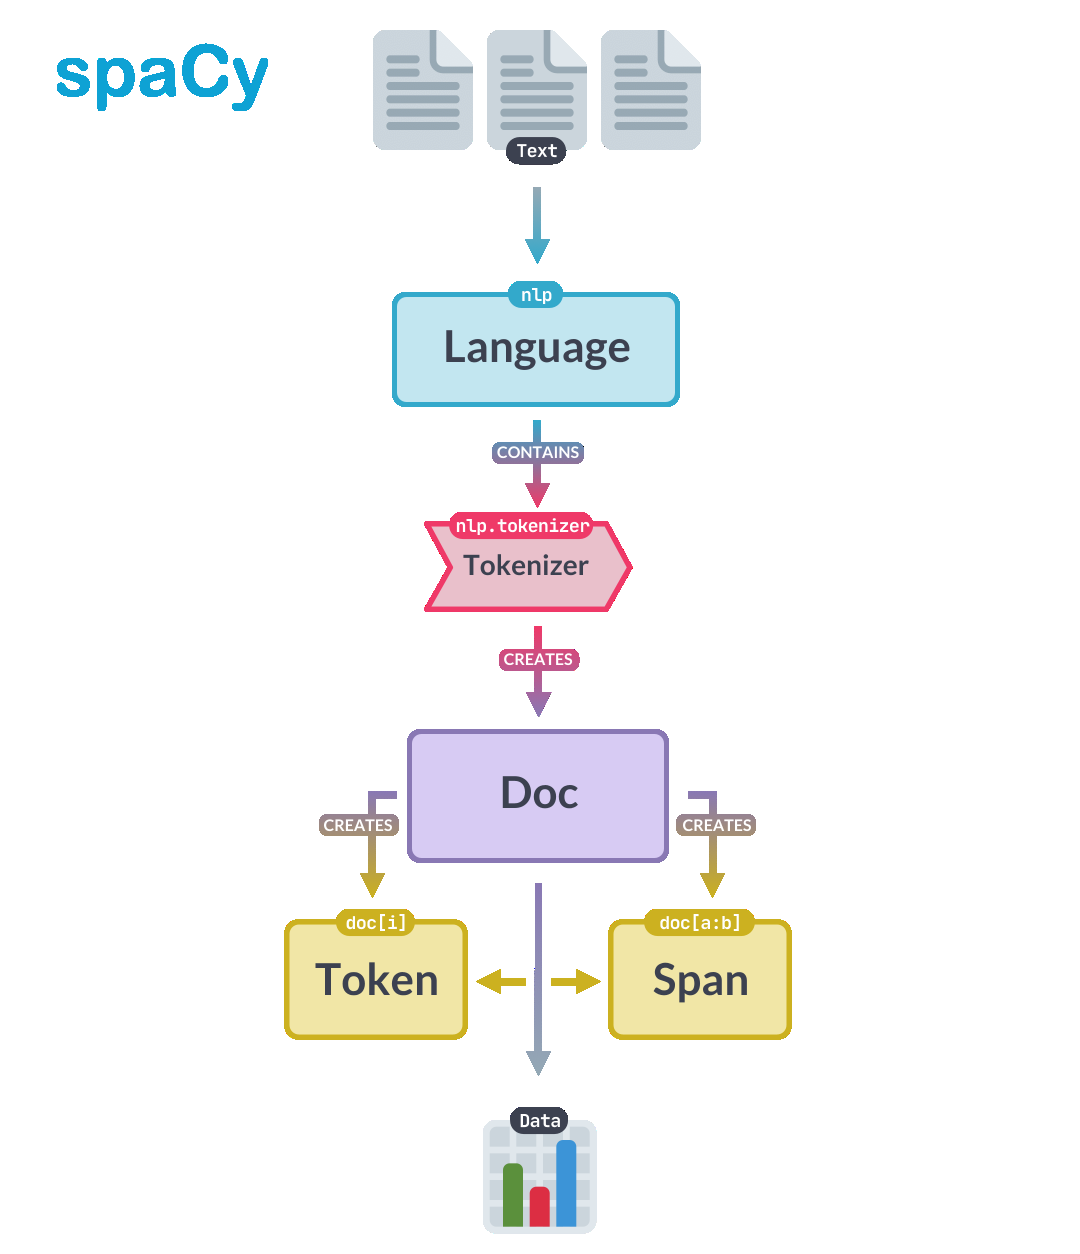

### The Process

spaCy is composed of different modules that run in order as shown here:

![spaCy pipeline](https://spacy.io/images/pipeline.svg)

#### What does each module do?

* **Tokenizer**: Tokenizes, that is, separates the elements of a text into "tokens" or segments that contain words, punctuation marks, etc.

* **Tagger**: Assigns labels to each token, such as "VERB", "ADJ", or "PUNCT".

* **Parser**: Labels the tokens with syntactic dependencies that describe the relationships between them, such as "subject" and "object".

* **NER**: Categorizes named entities, that is, it tries to identify proper names, brands, etc.

* **Other**: Custom components.

### The Language Model

spaCy uses statistical models to try to predict the information (grammatical category, lemma, relations between words, etc.) of each element of a text. Don't be afraid of not understanding statistical models, spaCy gives us everything ready and we only have to load the model to start using it!

The library itself offers models for multiple languages, and in most cases even several models for the same language. For Spanish, which will be the one we will use for this session, we have:
* **en_core_web_sm**: Basic model of very small size (35Mb) but not too accurate. Very useful for testing things.
* **en_core_web_lg**: Larger model but also accurate. It offers more capabilities such as semantic `similarity`

We are going to use the large model, which we can load in Python by executing the following code:

In [ ]:
nlp = spacy.load("en_core_web_lg")

### Tokenizer

In spaCy, a token refers to a single unit of text, typically a word or a punctuation mark, that has been separated from the rest of the text. Tokenization is the process of breaking down a large piece of text into individual tokens.

In spaCy, tokens are represented by the Token object, which includes various linguistic annotations such as the token's lemma (base form), part-of-speech tag, dependency label, and more.

For example, given the sentence "I love pizza!", spaCy would tokenize it into four tokens: "I", "love", "pizza", and "!". Each of these tokens would be represented as a Token object with various linguistic annotations.

In [ ]:
sentence = nlp("I love pizza!")

In [ ]:
for token in sentence:
    print(token)

I
love
pizza
!


This is the most basic operation we can do, but spaCy also offers some powerful features such as **part-of-speech tagging** or **PoS tagging**, **dependency parsing**, and **Named Entity Recognition** or **NER**.

### PoS tagging

PoS tagging stands for Part-of-Speech tagging. It is the process of assigning grammatical parts-of-speech to words in a sentence. In natural language processing, PoS tagging is one of the fundamental tasks, which is used to identify and extract information about the syntactic structure of the text.

In PoS tagging, each word in a sentence is assigned a part-of-speech tag based on its context and definition. For example, a word "run" can be a verb in the sentence "I run every day" or a noun in the sentence "I went for a run." Common PoS tags include nouns, verbs, adjectives, adverbs, prepositions, conjunctions, pronouns, and interjections. 

In spaCy, PoS tagging is performed using a statistical model or a neural network, which has been trained on a large corpus of annotated text. The resulting PoS tags are stored as attributes of each Token object in a Doc object, allowing downstream tasks to easily access and utilize this information. PoS tagging is used in a variety of natural language processing tasks, such as text classification, named entity recognition, and sentiment analysis.

The complete default PoS tagset is:

    ADJ: adjective
    ADP: adposition
    ADV: adverb
    AUX: auxiliary
    CCONJ: coordinating conjunction
    DET: determiner
    INTJ: interjection
    NOUN: noun
    NUM: numeral
    PART: particle
    PRON: pronoun
    PROPN: proper noun
    PUNCT: punctuation
    SCONJ: subordinating conjunction
    SYM: symbol
    VERB: verb
    X: other


### Dependecy parsing

n spaCy, dependency refers to the grammatical relationship between tokens in a sentence. Dependency parsing is the process of analyzing the grammatical structure of a sentence by identifying the relationships between its tokens.

Each token in a sentence is assigned a dependency label that describes its relationship with respect to the other tokens in the sentence. For example, in the sentence "I love pizza", the verb "love" depends on the subject "I", and the direct object "pizza" depends on the verb "love". These relationships can be visualized using a dependency tree, where each token is represented as a node in the tree and the relationships between the tokens are represented as edges.

Dependency parsing is useful for a variety of natural language processing tasks, such as named entity recognition, relation extraction, and question answering. In spaCy, dependency parsing is performed using a neural network-based parser that is trained on a large corpus of text. The resulting dependency labels are stored as attributes of each `Token` object, allowing downstream tasks to easily access and utilize this information.

It is also possible to visualize this relations thanks to the `displacy`, a web-based visualizer for syntactic and semantic dependencies that comes with spaCy. It provides an interactive and intuitive way to visualize the relationships between tokens in a sentence or a document.

In [ ]:
dependency_example = nlp("Apple is looking at buying U.K. startup for $1 billion")

In [ ]:
displacy.render(dependency_example, style="dep", jupyter=True)

#### Complete default list of dependency tags:

          ROOT   None
           acl   clausal modifier of noun (adjectival clause)
         acomp   adjectival complement
         advcl   adverbial clause modifier
        advmod   adverbial modifier
         agent   agent
          amod   adjectival modifier
         appos   appositional modifier
          attr   attribute
           aux   auxiliary
       auxpass   auxiliary (passive)
          case   case marking
            cc   coordinating conjunction
         ccomp   clausal complement
      compound   compound
          conj   conjunct
         csubj   clausal subject
     csubjpass  clausal subject (passive)
        dative  dative
           dep  unclassified dependent
           det  determiner
          dobj  direct object
          expl  expletive
          intj  interjection
          mark  marker
          meta  meta modifier
           neg  negation modifier
          nmod  modifier of nominal
      npadvmod  noun phrase as adverbial modifier
         nsubj  nominal subject
     nsubjpass  nominal subject (passive)
        nummod  numeric modifier
          oprd  object predicate
     parataxis  parataxis
         pcomp  complement of preposition
          pobj  object of preposition
          poss  possession modifier
       preconj  pre-correlative conjunction
        predet  None
          prep  prepositional modifier
           prt  particle
         punct  punctuation
      quantmod  modifier of quantifier
         relcl  relative clause modifier
         xcomp  open clausal complement

### NER

#### What is NER?

NER stands for Named Entity Recognition, which is the process of identifying and categorizing named entities in text into predefined categories such as person names, organizations, locations, medical codes, time expressions, quantities, monetary values, etc.

spaCy provides an easy-to-use API for performing NER on text. For example, we can use some recent news article to extract all the named entities.

We can do this on the following news article:

In [ ]:
# Extracted from https://www.morningstaronline.co.uk/article/b/campaigner-arrested-shouting-who-elected-him-fears-police-will-take-hardline

news_article = """A man who was arrested for shouting “Who elected him?” during a proclamation ceremony for the King fears he will be detained again as he takes part in a planned protest during the coronation.
Long-time peace activist Symon Hill called out during the ceremony at Carfax Tower in Oxford in September and was handcuffed and arrested.
He was charged with using threatening or abusive words or disorderly behaviour likely to cause harassment, alarm or distress, but this was later dropped by prosecutors after a review.
Mr Hill, from Oxford, plans to take part in the Republic protest in central London tomorrow, which has been organised in co-operation with the Metropolitan Police.
On Wednesday the force said officers would take a tough line with protesters who disrupt the coronation.
Deputy assistant commissioner Ade Adelekan said: “We have an extremely low threshold for anybody or anything that will disrupt this event and what you will see is very swift action from us.”
Mr Hill said he fears arrests will be made on “spurious grounds” and that members of the public are being put off exercising their right to protest.
He said: “I find the deputy assistant commissioner’s comments really alarming.
“Back in September, several people, including me, were arrested for voicing dissent to monarchy.
“After that, senior police officers made comments about respecting the right to protest, but that didn’t last long.
“If the police were simply applying the law in a neutral way as they often claim, this would include respecting the right to protest, not choosing their own ‘thresholds’ for peaceful dissent.”
New laws have come into force this week giving police greater powers to deal with protesters, including arrest for locking on, a tactic used to make it harder for officers to move demonstrators.
“In the last few days we’ve seen the new Public Order Act rushed through, a threatening letter sent by the Home Office to the organisers of a peaceful and lawful protest, and the Metropolitan Police boasting about how low the threshold for protest will be,” Mr Hill added.
“This follows weeks of scurrilous stories in certain newspapers involving ludicrous claims about republicans’ supposed plans for violent disruption.
“This is all contributing to an atmosphere that seems to be aimed at deterring people from exercising their right to peaceful protest.
“This all makes me more nervous, but more determined, to protest against monarchy on Saturday.
“In the light of recent events, I strongly suspect that the police will try to exceed their own powers and restrict free expression and people will be arrested on spurious grounds.
“Although I will be joining peaceful and lawful protests, I am seriously worried that I will be arrested again.”"""

First, we use spaCy to parse the text. This will be tagging our entities, among other things:

In [ ]:
doc = nlp(news_article)

Now we can use `displacy`, another spacy tool, to visualize our named entities!

In [ ]:
displacy.render(doc, style="ent", jupyter=True)

#### Complete default list of dependency tags:

In [ ]:
[f"{label}: {spacy.explain(label)}" for label in nlp.get_pipe('ner').labels]

['CARDINAL: Numerals that do not fall under another type',
 'DATE: Absolute or relative dates or periods',
 'EVENT: Named hurricanes, battles, wars, sports events, etc.',
 'FAC: Buildings, airports, highways, bridges, etc.',
 'GPE: Countries, cities, states',
 'LANGUAGE: Any named language',
 'LAW: Named documents made into laws.',
 'LOC: Non-GPE locations, mountain ranges, bodies of water',
 'MONEY: Monetary values, including unit',
 'NORP: Nationalities or religious or political groups',
 'ORDINAL: "first", "second", etc.',
 'ORG: Companies, agencies, institutions, etc.',
 'PERCENT: Percentage, including "%"',
 'PERSON: People, including fictional',
 'PRODUCT: Objects, vehicles, foods, etc. (not services)',
 'QUANTITY: Measurements, as of weight or distance',
 'TIME: Times smaller than a day',
 'WORK_OF_ART: Titles of books, songs, etc.']

# Working with books

All these visualizations are very useful for relatively short texts, such as news articles, social media posts, etc. but when dealing with one ore more books, we will have to make thing less visual in order to get usefeul information.

## How to download books from public domain websites: Getting a book from Project Gutenberg


We are going to use the `gutenbergpy` python library to download our books from the Gutenberg Project: https://www.gutenberg.org/ using just Python, and the book identificacion number on the site, or `id`.

For the sake of convenience, we already have a very simple function to help us with that. With this function we can get the text of any book we want from the Gutenberg project by simply calling our function with the `id` of the book we want to get.

In [ ]:
def get_book(book_id):
    # Download book. This includes metadata
    raw_book = gutenbergpy.textget.get_text_by_id(book_id)
    # Clean the metadata
    clean_book = gutenbergpy.textget.strip_headers(raw_book)
    # Return the text
    return clean_book.decode().strip().lower()


There two ways to get the id from the books we want to download. The first one is looking up the book in the Gutenber Progect site and copying the id from the URL:
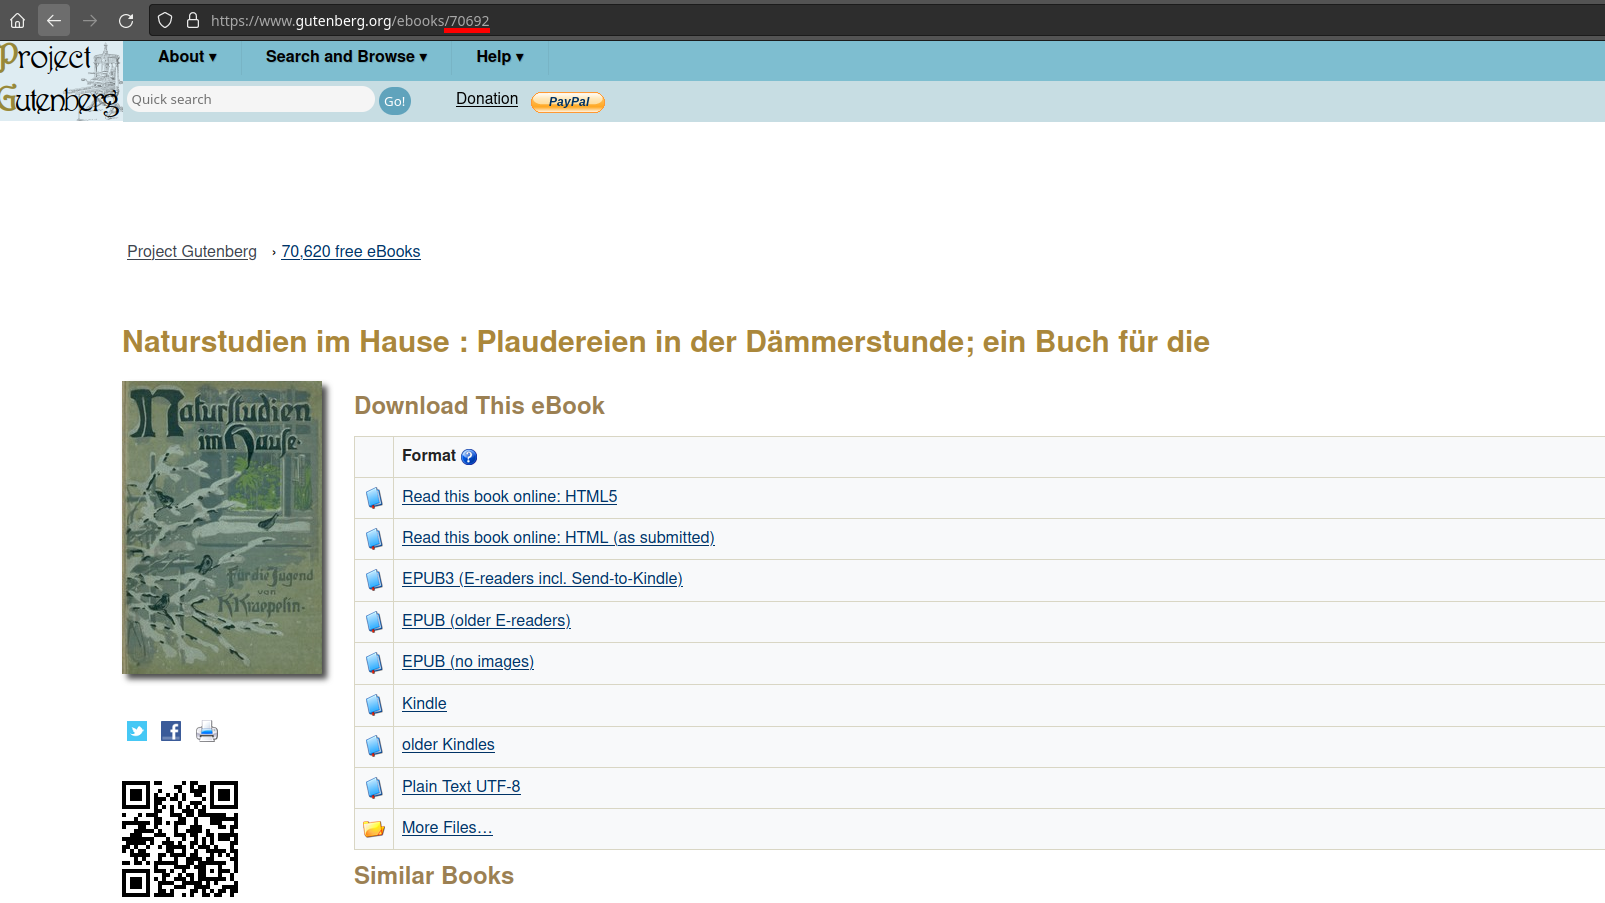

This is often good if you want to download just one book, but if y ou want to download several books, or even whole thematic collections, we can use Python to get a complete list of books with their respective IDs.

In this example we are going to use https://gutendex.com/ and the Python library `requests` to help us.

We can use several parameter to get what we want, for a complete list you can visit the Gutendex web site. Some examples include searching by `languages`, `author_year_start` and `author_year_end`, or `topic`. Since our exercise will focus on finding the scariest book, we will use the latter. 

In [ ]:
params = {
    'topic': 'horror',
    #'languages': 'English',
}

Now, we can call the gutendex site with the paremeters we want:

In [ ]:
response = requests.get('https://gutendex.com/books/', params=params)

As a result we get very long JSON/dictionary structure that we can expect to see what can we use from there.

In [ ]:
response.json()

{'count': 215,
 'next': 'https://gutendex.com/books/?page=2&topic=horror',
 'previous': None,
 'results': [{'id': 84,
   'title': 'Frankenstein; Or, The Modern Prometheus',
   'authors': [{'name': 'Shelley, Mary Wollstonecraft',
     'birth_year': 1797,
     'death_year': 1851}],
   'translators': [],
   'subjects': ["Frankenstein's monster (Fictitious character) -- Fiction",
    'Frankenstein, Victor (Fictitious character) -- Fiction',
    'Gothic fiction',
    'Horror tales',
    'Monsters -- Fiction',
    'Science fiction',
    'Scientists -- Fiction'],
   'bookshelves': ['Gothic Fiction',
    'Movie Books',
    'Precursors of Science Fiction',
    'Science Fiction by Women'],
   'languages': ['en'],
   'copyright': False,
   'media_type': 'Text',
   'formats': {'text/plain': 'https://www.gutenberg.org/ebooks/84.txt.utf-8',
    'application/octet-stream': 'https://www.gutenberg.org/files/84/84-0.zip',
    'text/plain; charset=us-ascii': 'https://www.gutenberg.org/files/84/84-0.txt',

For now, the only thing we are interested in are the `"results"`:

In [ ]:
response.json()["results"]

[{'id': 84,
  'title': 'Frankenstein; Or, The Modern Prometheus',
  'authors': [{'name': 'Shelley, Mary Wollstonecraft',
    'birth_year': 1797,
    'death_year': 1851}],
  'translators': [],
  'subjects': ["Frankenstein's monster (Fictitious character) -- Fiction",
   'Frankenstein, Victor (Fictitious character) -- Fiction',
   'Gothic fiction',
   'Horror tales',
   'Monsters -- Fiction',
   'Science fiction',
   'Scientists -- Fiction'],
  'bookshelves': ['Gothic Fiction',
   'Movie Books',
   'Precursors of Science Fiction',
   'Science Fiction by Women'],
  'languages': ['en'],
  'copyright': False,
  'media_type': 'Text',
  'formats': {'text/plain': 'https://www.gutenberg.org/ebooks/84.txt.utf-8',
   'application/octet-stream': 'https://www.gutenberg.org/files/84/84-0.zip',
   'text/plain; charset=us-ascii': 'https://www.gutenberg.org/files/84/84-0.txt',
   'application/x-mobipocket-ebook': 'https://www.gutenberg.org/ebooks/84.kf8.images',
   'application/epub+zip': 'https://www.

## Compiling our corpus

As they are ordered by popularity (number of downloads) we are going to get the top 5:

In [ ]:
gutenberg_top5 = response.json()["results"][:5]

In [ ]:
gutenberg_top5

[{'id': 84,
  'title': 'Frankenstein; Or, The Modern Prometheus',
  'authors': [{'name': 'Shelley, Mary Wollstonecraft',
    'birth_year': 1797,
    'death_year': 1851}],
  'translators': [],
  'subjects': ["Frankenstein's monster (Fictitious character) -- Fiction",
   'Frankenstein, Victor (Fictitious character) -- Fiction',
   'Gothic fiction',
   'Horror tales',
   'Monsters -- Fiction',
   'Science fiction',
   'Scientists -- Fiction'],
  'bookshelves': ['Gothic Fiction',
   'Movie Books',
   'Precursors of Science Fiction',
   'Science Fiction by Women'],
  'languages': ['en'],
  'copyright': False,
  'media_type': 'Text',
  'formats': {'text/plain': 'https://www.gutenberg.org/ebooks/84.txt.utf-8',
   'application/octet-stream': 'https://www.gutenberg.org/files/84/84-0.zip',
   'text/plain; charset=us-ascii': 'https://www.gutenberg.org/files/84/84-0.txt',
   'application/x-mobipocket-ebook': 'https://www.gutenberg.org/ebooks/84.kf8.images',
   'application/epub+zip': 'https://www.

Now, we can iterate through this list in order to create a simpler structure with just the information we need: ID, title, author, and the text of the book:

In [ ]:
corpus_list = []
for book in gutenberg_top5:
    book_id = book["id"]
    book_title = book["title"]
    book_author = book["authors"][0]["name"]
    book_downloads = book["download_count"]
    corpus_list.append({"id": book_id, "title": book_title, "author": book_author, "downloads": book_downloads})

In [ ]:
corpus_list

[{'id': 84,
  'title': 'Frankenstein; Or, The Modern Prometheus',
  'author': 'Shelley, Mary Wollstonecraft',
  'downloads': 62481},
 {'id': 345, 'title': 'Dracula', 'author': 'Stoker, Bram', 'downloads': 20753},
 {'id': 5200,
  'title': 'Metamorphosis',
  'author': 'Kafka, Franz',
  'downloads': 18856},
 {'id': 43,
  'title': 'The Strange Case of Dr. Jekyll and Mr. Hyde',
  'author': 'Stevenson, Robert Louis',
  'downloads': 14646},
 {'id': 10007,
  'title': 'Carmilla',
  'author': 'Le Fanu, Joseph Sheridan',
  'downloads': 6128}]

Now, for each item in our corpus list, we can call our function to download the texts:

In [ ]:
for book in corpus_list:
    book["text"] = get_book(book["id"])

And convert our `corpus_list` object into something more user friendly:

In [ ]:
corpus_df = pd.DataFrame(corpus_list)

In [ ]:
corpus_df

,id,title,author,downloads,text
0,84,"Frankenstein; Or, The Modern Prometheus","Shelley, Mary Wollstonecraft",62481,"frankenstein;\n\nor, the modern prometheus\n\n..."
1,345,Dracula,"Stoker, Bram",20753,dracula\n\n _...
2,5200,Metamorphosis,"Kafka, Franz",18856,metamorphosis\n\nby franz kafka\n\ntranslated ...
3,43,The Strange Case of Dr. Jekyll and Mr. Hyde,"Stevenson, Robert Louis",14646,the strange case of dr. jekyll and mr. hyde\n\...
4,10007,Carmilla,"Le Fanu, Joseph Sheridan",6128,carmilla\n\nby joseph sheridan le fanu\n\ncopy...


Once we have all our data organized, we can use spaCy to extract useful information from the texts.

## Frankenstein

### Using spaCy to process and extract useful information from our data

Firs, we will use spacy to parse the book

In [ ]:
frankenstein = nlp(corpus_df.text[0])

Then, since the text contains punctuation, numbers, etc, we are going to clean it and just keep waht will be important for us. We will also filter stopwords since they will not be useful in our task. Thanks to spacy, this is very easy!

We will iterate through the text and add to the list everything we want:

In [ ]:
filtered_frankenstein = []
for token in frankenstein:
    if not token.is_punct and not token.is_stop and not token.is_oov and not token.is_space and token.is_alpha:
        filtered_frankenstein.append(token)

With our parsed text we can already get some useful information such as the number of words in the book. We can achieve this just by calculating the length of our `filtered_frankenstein` list:

In [ ]:
frankenstein_total_words = len(filtered_frankenstein)
frankenstein_total_words

30125

#### Most frequent words

Another task we can do is to take each word from the list and add it to a new dictionary object in the form of:

```word: number of occurrences```

The algorithm is pretty simple: Whenever we take a word from our list we try to put it in a new data structure. We check if the word is already there, if not, we add it and set number of occurrences to `1`. If the word is already in our new structure, we `add 1` to the number of occurrences:

In [ ]:
frankenstein_freq = {}
for token in filtered_frankenstein:
    lemma = token.lemma_.lower()
    if lemma in frankenstein_freq:
        frankenstein_freq[lemma] += 1
    else:
        frankenstein_freq[lemma] = 1

And again, we convert our temporary structure into something more visually appealling, and sort it by frequency:

In [ ]:
freq_df = pd.DataFrame(frankenstein_freq.items(), columns=['word', 'freq']).sort_values(by=["freq"], ascending=False)

In [ ]:
freq_df

,word,freq
134,man,181
222,father,134
37,feel,133
217,day,129
422,friend,125
...,...,...
3438,noise,1
1747,raising,1
1748,ghost,1
1750,liberally,1


Another important step, since the books will differ in number of words, is to analyze a fixed percent of the words. A good starting point is the top 1% most frequent word, so we calculate this number:

In [ ]:
frankenstein_top_percent = frankenstein_total_words / 100
frankenstein_top_percent

301.25

And we convert it to an integer (we can't get the 0.25 of a word!):

In [ ]:
frankenstein_top_percent = int(frankenstein_top_percent)
frankenstein_top_percent

301

And sort again by frequency:

In [ ]:
freq_df.sort_values(by=['freq'], ascending=False).head(top_percent)

,word,freq
134,man,181
222,father,134
37,feel,133
217,day,129
422,friend,125
...,...,...
3932,dreadful,12
749,record,12
2861,shudder,12
40,breeze,12


#### Most frequent verbs

Thanks to spacy we can edit minimally our previous code and just focus on words with a specific part of speech, for example if we want to just analyze the verbs we can use the Universal POS tags with spacy:

In [ ]:
frankenstein_freq_verb = {}
for token in filtered_frankenstein:
    if token.pos_ == "VERB":
        lemma = token.lemma_.lower()
        if lemma in frankenstein_freq_verb:
            frankenstein_freq_verb[lemma] += 1
        else:
            frankenstein_freq_verb[lemma] = 1

We can see for examplo the top 10 most used verbs:

In [ ]:
freq_verbs_df = pd.DataFrame(frankenstein_freq_verb.items(), columns=['word', 'freq']).sort_values(by=['freq'], ascending=False)

In [ ]:
freq_verbs_df.head(10)

,word,freq
8,feel,133
163,see,122
145,find,119
262,say,107
151,know,104
75,pass,91
110,think,89
122,appear,87
1,hear,87
198,come,81


#### 'Scariest' words


Another powerful tool we can use with spacy is the semantic similarity between words. Spacy assigns a value to each word (more precisely, a `vector`, a mathematical representation of the meaning of a word based on the other words it appears with:

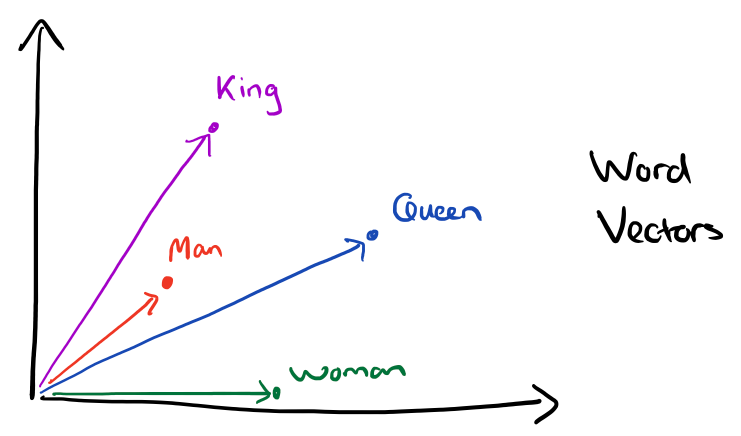

By measuring how close these vector are, we can determine if two words as semantically similar or not.

Let's start by choosing a word that represents the "scary" theme. We propose "fear". 

Analyzing this word with spacy will give us its `vector`, among other things:

In [ ]:
fear = nlp("fear")

In [ ]:
fear.vector

array([ 3.1131e+00,  1.1768e+00, -3.7102e+00,  3.7689e+00,  3.1112e+00,
        1.9262e+00,  4.1063e+00,  4.6431e+00, -3.0620e+00, -1.0196e+00,
        6.4159e+00, -8.1025e-01,  1.3678e+00,  4.5983e+00, -2.8158e+00,
        8.9228e-01,  3.6551e+00, -5.7158e+00, -2.3670e+00, -2.7850e-01,
        9.5402e-01, -5.9936e-01, -2.7408e+00, -4.5536e+00, -8.0156e-01,
       -2.6928e+00,  1.7837e+00, -4.1430e+00, -2.2797e+00,  4.2427e+00,
        3.6918e+00,  1.4222e+00,  2.7577e+00, -2.6255e-01, -2.9657e+00,
        9.9468e-01, -8.2860e-01,  5.6796e+00,  5.8063e+00,  4.6489e+00,
       -3.0133e+00,  1.1656e+00,  1.3215e+00,  2.7772e+00, -5.2847e+00,
       -5.8923e-01,  7.4599e-02, -1.4859e+00,  3.4457e+00,  4.5118e+00,
       -3.3637e+00, -8.7570e-01,  1.6484e+00, -5.8292e+00, -3.2210e+00,
        2.7375e+00,  3.7477e+00,  8.5598e-01,  3.8850e+00,  5.2258e+00,
        8.4827e-01, -1.7949e+00, -3.0731e-01, -2.0282e+00, -1.5995e+00,
        3.7521e-01, -5.0450e-01, -3.1850e+00, -7.0770e-01,  1.10

So now we can compare how close `fear` is to the rest of the words in the book.
We already had a list of all the words, but our list contains repeated words, and that will make the comparison slower, so we are going to filter this list and keep the unique words:

In [ ]:
frankenstein_unique_tokens = []
lemma_list = []
for token in filtered_frankenstein:
    if token.lemma_.lower() == token.lower_:
        if token.lemma_.lower() not in lemma_list:
            frankenstein_unique_tokens.append(token)
            lemma_list.append(token.lemma_.lower())

Just like we did before, we are going to convert all of our data into another DataFrame so we can see the results:

In [ ]:
fear_similarity_list = []
for token in frankenstein_unique_tokens:
    fear_similarity_list.append({"word": token.lemma_, "similarity": fear.similarity(token), "freq": frankenstein_freq[token.lemma_.lower()]})

And sort it by its frequency

In [ ]:
similarity_frankenstein_df = pd.DataFrame(fear_similarity_list).sort_values(by=['freq'], ascending=False)

In [ ]:
similarity_frankenstein_df.head(frankenstein_top_percent)

,word,similarity,freq
96,man,0.304354,181
166,father,0.297985,134
30,feel,0.435022,133
162,day,0.112188,129
321,friend,0.235476,125
...,...,...,...
1942,unable,0.280616,22
1514,dead,0.272474,22
797,deeply,0.362605,21
402,youth,0.202202,21


Or we can sort by similarity if we want to see which "scary" verbs are used the most:

In [ ]:
similarity_frankenstein_df.head(frankenstein_top_percent).sort_values(by=['similarity'], ascending=False)

,word,similarity,freq
99,fear,1.000000,66
855,despair,0.714562,50
2278,anguish,0.593864,24
1512,sorrow,0.586417,23
2760,rage,0.578756,26
...,...,...,...
2468,cottage,-0.037216,56
2987,agatha,-0.040294,22
188,hour,-0.041259,59
1184,elizabeth,-0.075082,92


#### Final score

In [ ]:
frankenstein_score = similarity_frankenstein_df.head(frankenstein_top_percent).similarity.mean()
frankenstein_score

0.256211424502519

##### Append results for the final comparison

##### Create empty list to store this and all future scores

In [ ]:
comparison = []

##### Append score to the list

In [ ]:
## How to download books from public domain websites: Getting a book from Project Gutenberg


We are going to use the `gutenbergpy` python library to download our books from the Gutenberg Project: https://www.gutenberg.org/ using just Python, and the book identificacion number on the site, or `id`.

For the sake of convenience, we already have a very simple function to help us with that. With this function we can get the text of any book we want from the Gutenberg project by simply calling our function with the `id` of the book we want to get.comparison.append({"book": "Frankenstein", "score": frankenstein_score})

## Dracula

We can repeat the previous process with all of our texts:

In [ ]:
dracula = nlp(corpus_df.text[1])

### Most frequent words

In [ ]:
filtered_dracula = []
for token in dracula:
    if not token.is_punct and not token.is_stop and not token.is_oov and not token.is_space and token.is_alpha:
        filtered_dracula.append(token)

In [ ]:
dracula_total_words = len(filtered_dracula)
dracula_total_words

58393

In [ ]:
dracula_top_percent = int(dracula_total_words / 100)
dracula_top_percent

583

In [ ]:
dracula_freq = {}
for token in filtered_dracula:
    lemma = token.lemma_.lower()
    if lemma in dracula_freq:
        dracula_freq[lemma] += 1
    else:
        dracula_freq[lemma] = 1


### 'Scariest' words


In [ ]:
dracula_unique_tokens = []
lemma_list = []
for token in filtered_dracula:
    if token.lemma_.lower() == token.lower_:
        if token.lemma_.lower() not in lemma_list:
            dracula_unique_tokens.append(token)
            lemma_list.append(token.lemma_.lower())

In [ ]:
dracula_fear_similarity_list = []
for token in dracula_unique_tokens:
    dracula_fear_similarity_list.append({"word": token.lemma_, "similarity": fear.similarity(token), "freq": dracula_freq[token.lemma_.lower()]})

In [ ]:
similarity_dracula_df = pd.DataFrame(dracula_fear_similarity_list).sort_values(by=['freq'], ascending=False)

In [ ]:
similarity_dracula_df.head(dracula_top_percent)

,word,similarity,freq
625,come,0.288175,779
129,know,0.410700,592
259,look,0.203206,466
94,time,0.270511,446
160,shall,0.203176,427
...,...,...,...
840,sky,0.141317,19
791,tremble,0.370596,19
1477,carefully,0.199616,19
1490,mystery,0.284221,19


In [ ]:
similarity_dracula_df.head(dracula_top_percent).sort_values(by=['similarity'], ascending=False)

,word,similarity,freq
397,fear,1.000000,188
1847,danger,0.675611,41
1526,dread,0.674273,31
771,afraid,0.592867,40
3785,sorrow,0.586417,21
...,...,...,...
2223,tea,-0.070506,22
26,lucy,-0.080459,294
2049,september,-0.091736,23
4625,october,-0.127026,20


### Final score

In [ ]:
dracula_score = similarity_dracula_df.head(dracula_top_percent).similarity.mean()
dracula_score

0.2146080736753131

In [ ]:
comparison.append({"book": "Dracula", "score": dracula_score})

## Metamorphosis

In [ ]:
metamorphosis = nlp(corpus_df.text[2])

### Most frequent words

In [ ]:
filtered_metamorphosis = []
for token in metamorphosis:
    if not token.is_punct and not token.is_stop and not token.is_oov and not token.is_space and token.is_alpha:
        filtered_metamorphosis.append(token)

In [ ]:
metamorphosis_total_words = len(filtered_metamorphosis)
metamorphosis_total_words

7638

In [ ]:
metamorphosis_top_percent = int(metamorphosis_total_words / 100)
metamorphosis_top_percent

76

In [ ]:
metamorphosis_freq = {}
for token in filtered_metamorphosis:
    lemma = token.lemma_.lower()
    if lemma in metamorphosis_freq:
        metamorphosis_freq[lemma] += 1
    else:
        metamorphosis_freq[lemma] = 1

### 'Scariest' words


In [ ]:
metamorphosis_unique_tokens = []
lemma_list = []
for token in filtered_metamorphosis:
    if token.lemma_.lower() == token.lower_:
        if token.lemma_.lower() not in lemma_list:
            metamorphosis_unique_tokens.append(token)
            lemma_list.append(token.lemma_.lower())

In [ ]:
metamorphosis_fear_similarity_list = []
for token in metamorphosis_unique_tokens:
    metamorphosis_fear_similarity_list.append({"word": token.lemma_, "similarity": fear.similarity(token), "freq": metamorphosis_freq[token.lemma_.lower()]})

In [ ]:
similarity_metamorphosis_df = pd.DataFrame(metamorphosis_fear_similarity_list).sort_values(by=['freq'], ascending=False)

In [ ]:
similarity_metamorphosis_df.head(metamorphosis_top_percent)

,word,similarity,freq
30,room,0.116796,133
244,father,0.297985,102
249,sister,0.150026,101
213,door,0.108723,97
233,mother,0.310959,89
...,...,...,...
128,notice,0.276281,18
1273,woman,0.265576,17
790,couch,0.028372,17
417,speak,0.332903,17


In [ ]:
similarity_metamorphosis_df.head(metamorphosis_top_percent).sort_values(by=['similarity'], ascending=False)

,word,similarity,freq
127,think,0.500816,49
126,thing,0.456038,36
64,feel,0.435022,36
348,happen,0.420040,23
96,know,0.410700,35
...,...,...,...
369,floor,0.011330,21
527,chair,-0.025043,19
381,flat,-0.028604,20
423,mr,-0.034991,23


### Final score

In [ ]:
metamorphosis_score = similarity_metamorphosis_df.head(metamorphosis_top_percent).similarity.mean()
metamorphosis_score

0.21354613522642077

In [ ]:
comparison.append({"book": "Metamorphosis", "score": metamorphosis_score})

## Dr. Jekyll and Mr. Hyde

In [ ]:
jekyll = nlp(corpus_df.text[3])

### Most frequent words

In [ ]:
filtered_jekyll = []
for token in jekyll:
    if not token.is_punct and not token.is_stop and not token.is_oov and not token.is_space and token.is_alpha:
        filtered_jekyll.append(token)

In [ ]:
jekyll_total_words = len(filtered_jekyll)
jekyll_total_words

9974

In [ ]:
jekyll_top_percent = int(jekyll_total_words / 100)
jekyll_top_percent

99

In [ ]:
jekyll_freq = {}
for token in filtered_jekyll:
    lemma = token.lemma_.lower()
    if lemma in jekyll_freq:
        jekyll_freq[lemma] += 1
    else:
        jekyll_freq[lemma] = 1

### 'Scariest' words


In [ ]:
jekyll_unique_tokens = []
lemma_list = []
for token in filtered_jekyll:
    if token.lemma_.lower() == token.lower_:
        if token.lemma_.lower() not in lemma_list:
            jekyll_unique_tokens.append(token)
            lemma_list.append(token.lemma_.lower())

In [ ]:
jekyll_fear_similarity_list = []
for token in jekyll_unique_tokens:
    jekyll_fear_similarity_list.append({"word": token.lemma_, "similarity": fear.similarity(token), "freq": jekyll_freq[token.lemma_.lower()]})

In [ ]:
similarity_jekyll_df = pd.DataFrame(jekyll_fear_similarity_list).sort_values(by=['freq'], ascending=False)

In [ ]:
similarity_jekyll_df.head(jekyll_top_percent)

,word,similarity,freq
4,mr,-0.034991,124
5,hyde,0.004544,100
3,jekyll,-0.041886,99
22,man,0.304354,99
316,come,0.288175,74
...,...,...,...
1197,death,0.327858,15
738,servant,0.157750,15
718,soul,0.377501,15
126,business,0.176405,15


In [ ]:
similarity_jekyll_df.head(jekyll_top_percent).sort_values(by=['similarity'], ascending=False)

,word,similarity,freq
496,fear,1.000000,21
1013,evil,0.503612,17
299,think,0.500816,62
337,suppose,0.463786,16
228,thing,0.456038,30
...,...,...,...
438,hour,-0.041259,24
3,jekyll,-0.041886,99
2,dr,-0.049474,45
102,enfield,-0.081278,19


### Final score

In [ ]:
jekyll_score = similarity_jekyll_df.head(jekyll_top_percent).similarity.mean()
jekyll_score

0.22059400210251098

In [ ]:
comparison.append({"book": "Dr. Jekyll and Mr. Hyde", "score": jekyll_score})

## Carmilla

In [ ]:
carmilla = nlp(corpus_df.text[4])

### Most frequent words

In [ ]:
filtered_carmilla = []
for token in carmilla:
    if not token.is_punct and not token.is_stop and not token.is_oov and not token.is_space and token.is_alpha:
        filtered_carmilla.append(token)

In [ ]:
carmilla_total_words = len(filtered_carmilla)
carmilla_total_words

10943

In [ ]:
carmilla_top_percent = int(carmilla_total_words / 100)
carmilla_top_percent

109

In [ ]:
carmilla_freq = {}
for token in filtered_carmilla:
    lemma = token.lemma_.lower()
    if lemma in carmilla_freq:
        carmilla_freq[lemma] += 1
    else:
        carmilla_freq[lemma] = 1

### 'Scariest' words


In [ ]:
carmilla_unique_tokens = []
lemma_list = []
for token in filtered_carmilla:
    if token.lemma_.lower() == token.lower_:
        if token.lemma_.lower() not in lemma_list:
            carmilla_unique_tokens.append(token)
            lemma_list.append(token.lemma_.lower())

In [ ]:
carmilla_fear_similarity_list = []
for token in carmilla_unique_tokens:
    carmilla_fear_similarity_list.append({"word": token.lemma_, "similarity": fear.similarity(token), "freq": carmilla_freq[token.lemma_.lower()]})

In [ ]:
similarity_carmilla_df = pd.DataFrame(carmilla_fear_similarity_list).sort_values(by=['freq'], ascending=False)

In [ ]:
similarity_carmilla_df.head(carmilla_top_percent)

,word,similarity,freq
106,father,0.297985,91
311,look,0.203206,79
261,room,0.116796,78
358,come,0.288175,76
87,little,0.316962,74
...,...,...,...
643,horror,0.370245,16
490,present,0.133535,16
867,foot,0.047668,16
616,suppose,0.463786,16


In [ ]:
similarity_carmilla_df.head(carmilla_top_percent).sort_values(by=['similarity'], ascending=False)

,word,similarity,freq
257,think,0.500816,65
470,hope,0.490333,16
616,suppose,0.463786,16
326,thing,0.456038,21
614,feel,0.435022,27
...,...,...,...
132,old,0.000502,54
354,visit,-0.000900,18
102,year,-0.016096,27
5,chapter,-0.035152,16


### Final score

In [ ]:
carmilla_score = similarity_carmilla_df.head(carmilla_top_percent).similarity.mean()
carmilla_score

0.22784117092394912

In [ ]:
comparison.append({"book": "Carmilla", "score": carmilla_score})

## Final comparison

Time to see our results! We can use our `comparison` variable to visualize the average similarity score of the top 1% words of each book with the word `"fear"`:

In [ ]:
results_df = pd.DataFrame(comparison)

In [ ]:
results_df.sort_values(by=["score"], ascending=False)

,book,score
0,Frankenstein,0.256211
4,Carmilla,0.227841
3,Dr. Jekyll and Mr. Hyde,0.220594
1,Dracula,0.214608
2,Metamorphosis,0.213546
